In [158]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()


Saving expiry_barcode_dataset (2).zip to expiry_barcode_dataset (2) (1).zip


In [159]:
import zipfile
import os

# Define the name of the uploaded zip file
zip_file = list(uploaded.keys())[0]

# Define the extraction path
extract_dir = '/content/expiry_barcode_dataset'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")


Files extracted to /content/expiry_barcode_dataset


In [160]:
# List the files in the extraction directory
extracted_files = os.listdir(extract_dir)
print(extracted_files)

['expiry_barcode_dataset']


Displaying images from the train directory:


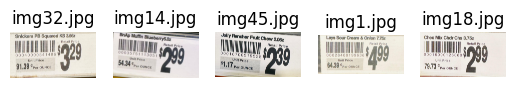

Displaying images from the test directory:


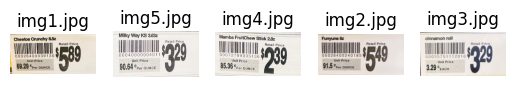

Displaying images from the validation directory:


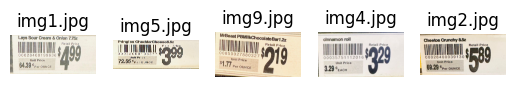

In [161]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the extraction directory
extract_dir = '/content/expiry_barcode_dataset/expiry_barcode_dataset/images'

# Directories for train, test, and validation
train_dir = os.path.join(extract_dir, 'train')
test_dir = os.path.join(extract_dir, 'test')
val_dir = os.path.join(extract_dir, 'val')

# Function to display images from a directory
def display_images_from_directory(directory, title):
    images = os.listdir(directory)
    print(f"Displaying images from the {title} directory:")

    # Display the first 5 images in the directory
    for i, image_name in enumerate(images[:5]):
        image_path = os.path.join(directory, image_name)
        img = Image.open(image_path)
        plt.subplot(1, 5, i + 1)  # 1 row, 5 columns
        plt.imshow(img)
        plt.axis('off')  # Hide axes for cleaner look
        plt.title(image_name)

    plt.show()

# Display images from train, test, and validation directories
display_images_from_directory(train_dir, 'train')
display_images_from_directory(test_dir, 'test')
display_images_from_directory(val_dir, 'validation')


In [162]:
import os

# Define the extraction directory
extract_dir = '/content/expiry_barcode_dataset/expiry_barcode_dataset/images'

# Directories for train, test, and validation
train_dir = os.path.join(extract_dir, 'train')
test_dir = os.path.join(extract_dir, 'test')
val_dir = os.path.join(extract_dir, 'val')

# Count the number of images in each directory
num_train_images = len(os.listdir(train_dir))
num_test_images = len(os.listdir(test_dir))
num_val_images = len(os.listdir(val_dir))

# Print the number of images in each dataset
print(f"Number of images in the 'train' dataset: {num_train_images}")
print(f"Number of images in the 'test' dataset: {num_test_images}")
print(f"Number of images in the 'validation' dataset: {num_val_images}")


Number of images in the 'train' dataset: 45
Number of images in the 'test' dataset: 5
Number of images in the 'validation' dataset: 10


In [163]:
!pip install pyzbar pillow

In [164]:
!apt-get install libzbar0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [165]:
import os
from PIL import Image
from pyzbar.pyzbar import decode

# Define the extraction directory
extract_dir = '/content/expiry_barcode_dataset/expiry_barcode_dataset/images'

# Define the train directory
train_dir = os.path.join(extract_dir, 'train')

# Get the first image file from the train dataset
train_images = os.listdir(train_dir)
first_image_name = train_images[0]  # Get the first image
first_image_path = os.path.join(train_dir, first_image_name)

# Open the image using PIL
img = Image.open(first_image_path)

# Decode the barcode or QR code in the image
decoded_objects = decode(img)

# Display the decoded information
print(f"Decoded information from the image {first_image_name}:")
for obj in decoded_objects:
    print("Type:", obj.type)
    print("Data:", obj.data.decode('utf-8'))

# Optionally display the image
img.show()

Decoded information from the image img32.jpg:
Type: CODE128
Data: 00040000541486


In [166]:
import requests

# Your decoded EAN code
ean_code = "00040000541486"  # Replace with your decoded EAN

# Sample API URL with your API key
api_url = f'https://api.upcitemdb.com/prod/trial/lookup?upc={ean_code}'  # Replace with your actual API key

response = requests.get(api_url)

if response.status_code == 200:
    product_info = response.json()
    if product_info['items']:
        product = product_info['items'][0]  # Get the first item
        print(f"Product Name: {product.get('title', 'N/A')}")
        print(f"Brand: {product.get('brand', 'N/A')}")
        print(f"Description: {product.get('description', 'N/A')}")
        print(f"Image URL: {product.get('images', ['N/A'])[0]}")
    else:
        print("No product information found.")
else:
    print("Failed to retrieve product information.")

Product Name: Snickers Peanut Butter Squared 4 to Go Chocolate Candy Bars  3.56 oz. Pack  18 Ct.Box
Brand: Snickers
Description: Being a square never tasted this good. When you?re looking for a snack that really satisfies  look no further than SNICKERS. SNICKERS Peanut Butter Squared has it down to a science. Peanut butter  peanuts  caramel and nougat together as one. Delicious whether simply unwrapped and enjoyed  or incorporated into your favorite dessert recipes  Snickers handles your hunger so that you can handle  well... anything.
Image URL: https://i5.walmartimages.com/asr/9d10ad68-82f7-44ef-8a79-ab6a0995e072_1.93f716f4a6619e35096c75b119639e78.jpeg?odnHeight=450&odnWidth=450&odnBg=ffffff


In [167]:
import os
from PIL import Image
from pyzbar.pyzbar import decode
import requests

# Define the extraction directory
extract_dir = '/content/expiry_barcode_dataset/expiry_barcode_dataset/images'

# Define the train directory
train_dir = os.path.join(extract_dir, 'train')

# Get all image files in the train dataset
train_images = os.listdir(train_dir)

# Iterate through all images in the train dataset
for image_name in train_images:
    image_path = os.path.join(train_dir, image_name)

    # Open the image using PIL
    img = Image.open(image_path)

    # Decode the barcode or QR code in the image
    decoded_objects = decode(img)

    # Display the decoded information
    print(f"Decoded information from the image {image_name}:")

    for obj in decoded_objects:
        barcode_data = obj.data.decode('utf-8')
        print(f"Type: {obj.type}")
        print(f"Data: {barcode_data}")

        # Use the decoded barcode data to fetch product info via API (example for UPC)
        api_url = f'https://api.upcitemdb.com/prod/trial/lookup?upc={barcode_data}'  # Replace with your actual API key

        try:
            response = requests.get(api_url)
            if response.status_code == 200:
                product_info = response.json()
                if product_info['items']:
                    product = product_info['items'][0]  # Get the first item
                    print(f"Product Name: {product.get('title', 'N/A')}")
                    print(f"Brand: {product.get('brand', 'N/A')}")
                    print(f"Description: {product.get('description', 'N/A')}")
                    print(f"Image URL: {product.get('images', ['N/A'])[0]}")
                else:
                    print("No product information found.")
            else:
                print(f"Failed to retrieve product information for barcode {barcode_data}.")
        except Exception as e:
            print(f"Error retrieving product info for {barcode_data}: {str(e)}")

    print("\n" + "-"*50 + "\n")  # Separator for better readability

Decoded information from the image img32.jpg:
Type: CODE128
Data: 00040000541486
Product Name: Snickers Peanut Butter Squared 4 to Go Chocolate Candy Bars  3.56 oz. Pack  18 Ct.Box
Brand: Snickers
Description: Being a square never tasted this good. When you?re looking for a snack that really satisfies  look no further than SNICKERS. SNICKERS Peanut Butter Squared has it down to a science. Peanut butter  peanuts  caramel and nougat together as one. Delicious whether simply unwrapped and enjoyed  or incorporated into your favorite dessert recipes  Snickers handles your hunger so that you can handle  well... anything.
Image URL: https://i5.walmartimages.com/asr/9d10ad68-82f7-44ef-8a79-ab6a0995e072_1.93f716f4a6619e35096c75b119639e78.jpeg?odnHeight=450&odnWidth=450&odnBg=ffffff

--------------------------------------------------

Decoded information from the image img14.jpg:
Type: CODE128
Data: 00035751113051
Product Name: BLUEBERRY MUFFIN
Brand: Bon Appetit
Description: INGREDIENTS: BLEACH

In [168]:
import os
from PIL import Image
from pyzbar.pyzbar import decode
import requests

# Define the extraction directory
extract_dir = '/content/expiry_barcode_dataset/expiry_barcode_dataset/images'

# Define the directories for test and validation datasets
test_dir = os.path.join(extract_dir, 'test')
val_dir = os.path.join(extract_dir, 'val')

# Get all image files in the test dataset
test_images = os.listdir(test_dir)

# Decode images in the test dataset
for image_name in test_images:
    image_path = os.path.join(test_dir, image_name)

    # Open the image using PIL
    img = Image.open(image_path)

    # Decode the barcode or QR code in the image
    decoded_objects = decode(img)

    # Display the decoded information
    print(f"Decoded information from the image {image_name} (Test dataset):")

    for obj in decoded_objects:
        barcode_data = obj.data.decode('utf-8')
        print(f"Type: {obj.type}")
        print(f"Data: {barcode_data}")

        # Use the decoded barcode data to fetch product info via API (example for UPC)
        api_url = f'https://api.upcitemdb.com/prod/trial/lookup?upc={barcode_data}'  # Replace with your actual API key

        try:
            response = requests.get(api_url)
            if response.status_code == 200:
                product_info = response.json()
                if product_info['items']:
                    product = product_info['items'][0]  # Get the first item
                    print(f"Product Name: {product.get('title', 'N/A')}")
                    print(f"Brand: {product.get('brand', 'N/A')}")
                    print(f"Description: {product.get('description', 'N/A')}")
                    print(f"Image URL: {product.get('images', ['N/A'])[0]}")
                else:
                    print("No product information found.")
            else:
                print(f"Failed to retrieve product information for barcode {barcode_data}.")
        except Exception as e:
            print(f"Error retrieving product info for {barcode_data}: {str(e)}")

    print("\n" + "-"*50 + "\n")  # Separator for better readability

# Get all image files in the validation dataset
val_images = os.listdir(val_dir)

# Decode images in the validation dataset
for image_name in val_images:
    image_path = os.path.join(val_dir, image_name)

    # Open the image using PIL
    img = Image.open(image_path)

    # Decode the barcode or QR code in the image
    decoded_objects = decode(img)

    # Display the decoded information
    print(f"Decoded information from the image {image_name} (Validation dataset):")

    for obj in decoded_objects:
        barcode_data = obj.data.decode('utf-8')
        print(f"Type: {obj.type}")
        print(f"Data: {barcode_data}")

        # Use the decoded barcode data to fetch product info via API (example for UPC)
        api_url = f'https://api.upcitemdb.com/prod/trial/lookup?upc={barcode_data}'  # Replace with your actual API key

        try:
            response = requests.get(api_url)
            if response.status_code == 200:
                product_info = response.json()
                if product_info['items']:
                    product = product_info['items'][0]  # Get the first item
                    print(f"Product Name: {product.get('title', 'N/A')}")
                    print(f"Brand: {product.get('brand', 'N/A')}")
                    print(f"Description: {product.get('description', 'N/A')}")
                    print(f"Image URL: {product.get('images', ['N/A'])[0]}")
                else:
                    print("No product information found.")
            else:
                print(f"Failed to retrieve product information for barcode {barcode_data}.")
        except Exception as e:
            print(f"Error retrieving product info for {barcode_data}: {str(e)}")

    print("\n" + "-"*50 + "\n")  # Separator for better readability


Decoded information from the image img1.jpg (Test dataset):
Type: CODE128
Data: 00028400039130
Failed to retrieve product information for barcode 00028400039130.

--------------------------------------------------

Decoded information from the image img5.jpg (Test dataset):
Type: CODE128
Data: 00040000004011
Failed to retrieve product information for barcode 00040000004011.

--------------------------------------------------

Decoded information from the image img4.jpg (Test dataset):
Type: CODE128
Data: 00072799035136
Failed to retrieve product information for barcode 00072799035136.

--------------------------------------------------

Decoded information from the image img2.jpg (Test dataset):
Type: CODE128
Data: 00028400240185
Failed to retrieve product information for barcode 00028400240185.

--------------------------------------------------

Decoded information from the image img3.jpg (Test dataset):
Type: CODE128
Data: 00035751112016
Failed to retrieve product information for ba

In [169]:
import os

# Print the current working directory
print(os.getcwd())


/content


In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Specify the path to the dataset.csv file (if it's in the current directory)
csv_file_path = '/content/expiry_barcode_dataset/expiry_barcode_dataset/dataset.csv'

# Read the CSV file
dataset = pd.read_csv(csv_file_path)

dataset

,file_name,path,label,product_name,prize,quantity,expiry_date
0,img1.jpg,expiry_barcode_dataset/images/train\img1.jpg,train,lays_sourcreamandonion,4.99,10,2/19/2025
1,img10.jpg,expiry_barcode_dataset/images/train\img10.jpg,train,funguns,5.49,6,6/24/2025
2,img11.jpg,expiry_barcode_dataset/images/train\img11.jpg,train,7SHotMangoHoneyBun,1.99,5,5/3/2025
3,img12.jpg,expiry_barcode_dataset/images/train\img12.jpg,train,7SBreadSliceckIcedLmn,1.00,8,6/14/2025
4,img13.jpg,expiry_barcode_dataset/images/train\img13.jpg,train,7SMuffinBananaWalnut,2.89,9,12/24/2025
5,img14.jpg,expiry_barcode_dataset/images/train\img14.jpg,train,BnAPMuffinBlueberry,2.99,15,11/24/2025
6,img15.jpg,expiry_barcode_dataset/images/train\img15.jpg,train,cinnamon_roll,3.29,6,12/28/2024
7,img16.jpg,expiry_barcode_dataset/images/train\img16.jpg,train,bnApPanDeQueSoCheeseCake,2.99,10,5/12/2025
8,img17.jpg,expiry_barcode_dataset/images/train\img17.jpg,train,ChexMixTraditional,2.99,8,4/3/2025
9,img18.jpg,expiry_barcode_dataset/images/train\img18.jpg,train,ChexMixCHdrChd,2.99,7,6/21/2025


**Exploratory Data Analysis (EDA)**

In [171]:
# Display the first few rows of the dataset
print(dataset.head())

   file_name                                           path  label  \
0   img1.jpg   expiry_barcode_dataset/images/train\img1.jpg  train   
1  img10.jpg  expiry_barcode_dataset/images/train\img10.jpg  train   
2  img11.jpg  expiry_barcode_dataset/images/train\img11.jpg  train   
3  img12.jpg  expiry_barcode_dataset/images/train\img12.jpg  train   
4  img13.jpg  expiry_barcode_dataset/images/train\img13.jpg  train   

             product_name  prize  quantity expiry_date  
0  lays_sourcreamandonion   4.99        10   2/19/2025  
1                 funguns   5.49         6   6/24/2025  
2      7SHotMangoHoneyBun   1.99         5    5/3/2025  
3   7SBreadSliceckIcedLmn   1.00         8   6/14/2025  
4    7SMuffinBananaWalnut   2.89         9  12/24/2025  


In [172]:
# Display the tail few rows of the dataset
print(dataset.tail())

   file_name                                         path label  \
55  img1.jpg  expiry_barcode_dataset/images/test\img1.jpg  test   
56  img2.jpg  expiry_barcode_dataset/images/test\img2.jpg  test   
57  img3.jpg  expiry_barcode_dataset/images/test\img3.jpg  test   
58  img4.jpg  expiry_barcode_dataset/images/test\img4.jpg  test   
59  img5.jpg  expiry_barcode_dataset/images/test\img5.jpg  test   

             product_name  prize  quantity expiry_date  
55        cheetos_crunchy   5.89         5   12/4/2025  
56                funguns   5.49         8   6/24/2025  
57          cinnamon_roll   3.29         4    9/8/2025  
58  mamba_fruit_chewstick   2.39         9  12/31/2024  
59              milky_way   3.29        10   1/12/2025  


In [173]:
dataset.columns

Index(['file_name', 'path', 'label', 'product_name', 'prize', 'quantity',
       'expiry_date'],
      dtype='object')

In [174]:
dataset.describe()

,prize,quantity
count,60.000000,60.000000
mean,3.683500,8.083333
std,1.370782,3.632675
min,1.000000,1.000000
25%,2.965000,5.000000
50%,3.290000,8.000000
75%,4.315000,10.000000
max,9.090000,15.000000


In [175]:
# General Information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   file_name     60 non-null     object 
 1   path          60 non-null     object 
 2   label         60 non-null     object 
 3   product_name  60 non-null     object 
 4   prize         60 non-null     float64
 5   quantity      60 non-null     int64  
 6   expiry_date   60 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.4+ KB
None


In [176]:
# Check for missing values
print(dataset.isnull().sum())

file_name       0
path            0
label           0
product_name    0
prize           0
quantity        0
expiry_date     0
dtype: int64


In [177]:
# Describe the dataset for statistical summaries
print(dataset.describe())

           prize   quantity
count  60.000000  60.000000
mean    3.683500   8.083333
std     1.370782   3.632675
min     1.000000   1.000000
25%     2.965000   5.000000
50%     3.290000   8.000000
75%     4.315000  10.000000
max     9.090000  15.000000


In [178]:
dataset.product_name

,product_name
0,lays_sourcreamandonion
1,funguns
2,7SHotMangoHoneyBun
3,7SBreadSliceckIcedLmn
4,7SMuffinBananaWalnut
5,BnAPMuffinBlueberry
6,cinnamon_roll
7,bnApPanDeQueSoCheeseCake
8,ChexMixTraditional
9,ChexMixCHdrChd


In [179]:
# Ensure 'dataset' is your DataFrame variable name
total_quantity_sum = dataset['quantity'].sum()
print("Total Quantity Sum:", total_quantity_sum)

Total Quantity Sum: 485


In [180]:
# Find the row with the maximum quantity
max_quantity_product = dataset.loc[dataset['quantity'].idxmax()]

# Display the product name and quantity
print("Product with maximum quantity:", max_quantity_product['product_name'])
print("Maximum Quantity:", max_quantity_product['quantity'])

Product with maximum quantity: BnAPMuffinBlueberry
Maximum Quantity: 15


In [181]:
# Find the row with the minimum quantity
min_quantity_product = dataset.loc[dataset['quantity'].idxmin()]

# Display the product name and quantity
print("Product with minimum quantity:", min_quantity_product['product_name'])
print("Minimum Quantity:", min_quantity_product['quantity'])

Product with minimum quantity: SnickersBar
Minimum Quantity: 1


**Data Cleaning and Preprocessing**

Convert Data Types: Make sure that numerical columns are numeric, and categorical columns are of the appropriate type.

In [182]:
# Convert 'expiry_date' column to datetime
dataset['expiry_date'] = pd.to_datetime(dataset['expiry_date'], format='%m/%d/%Y')

# Convert 'prize' and 'quantity' to numeric (if not already)
dataset['prize'] = pd.to_numeric(dataset['prize'], errors='coerce')
dataset['quantity'] = pd.to_numeric(dataset['quantity'], errors='coerce')

# Check if changes were applied
print(dataset.dtypes)


file_name               object
path                    object
label                   object
product_name            object
prize                  float64
quantity                 int64
expiry_date     datetime64[ns]
dtype: object


Handle Missing Data: Handle missing values (if any).

In [183]:
# Impute or drop missing values
dataset = dataset.dropna(subset=['prize', 'quantity'])  # Drop rows with missing prize or quantity

# Or, if you'd prefer, you can fill missing values
dataset['prize'].fillna(dataset['prize'].mean(), inplace=True)
dataset['quantity'].fillna(dataset['quantity'].median(), inplace=True)

<ipython-input-183-33c192094c51>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['prize'].fillna(dataset['prize'].mean(), inplace=True)
<ipython-input-183-33c192094c51>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Handling Outliers: Identify and deal with outliers in numerical data

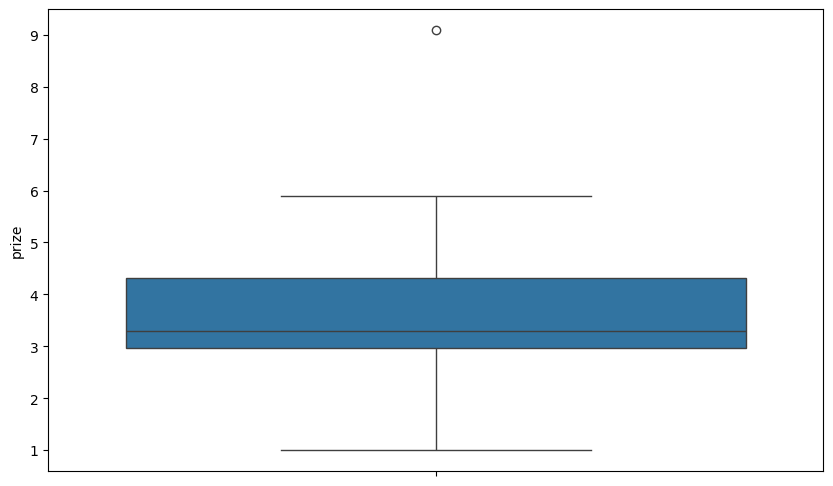

In [184]:

# Visualize outliers using boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset['prize'])

# Remove outliers (optional)
q1 = dataset['prize'].quantile(0.25)
q3 = dataset['prize'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

dataset = dataset[(dataset['prize'] >= lower_bound) & (dataset['prize'] <= upper_bound)]


**Feature Engineering**

Extract Features from Expiry Date: For example, extract the year, month, and day from the expiry date.

In [185]:
dataset['expiry_year'] = dataset['expiry_date'].dt.year
dataset['expiry_month'] = dataset['expiry_date'].dt.month
dataset['expiry_day'] = dataset['expiry_date'].dt.day

# Print the expiry year, expiry month, and expiry day
print("Expiry Year:")
print(dataset['expiry_year'])

print("\nExpiry Month:")
print(dataset['expiry_month'])

print("\nExpiry Day:")
print(dataset['expiry_day'])


Expiry Year:
0     2025
1     2025
2     2025
3     2025
4     2025
5     2025
6     2024
7     2025
8     2025
9     2025
11    2024
12    2025
13    2025
14    2025
15    2025
16    2025
17    2025
18    2025
19    2025
20    2025
21    2025
22    2025
23    2025
24    2025
25    2025
26    2025
27    2025
28    2025
29    2025
30    2025
31    2025
32    2025
33    2025
34    2025
35    2025
36    2025
37    2025
38    2025
39    2025
40    2024
41    2024
42    2025
43    2025
44    2025
45    2025
46    2024
47    2025
48    2025
49    2025
50    2024
51    2025
52    2025
53    2024
54    2025
55    2025
56    2025
57    2025
58    2024
59    2025
Name: expiry_year, dtype: int32

Expiry Month:
0      2
1      6
2      5
3      6
4     12
5     11
6     12
7      5
8      4
9      6
11    12
12     4
13     6
14     4
15     5
16     3
17     3
18     6
19     6
20     5
21     3
22     6
23     7
24     9
25     6
26     1
27     6
28     5
29     6
30     5
31     4
32     3
33 

Categorical Encoding: If you have categorical columns like product_name, you can encode them.


In [186]:
# Encoding categorical variable 'product_name' using Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['product_name_encoded'] = encoder.fit_transform(dataset['product_name'])


**Data Visualization**

Distribution of Prize and Quantity:

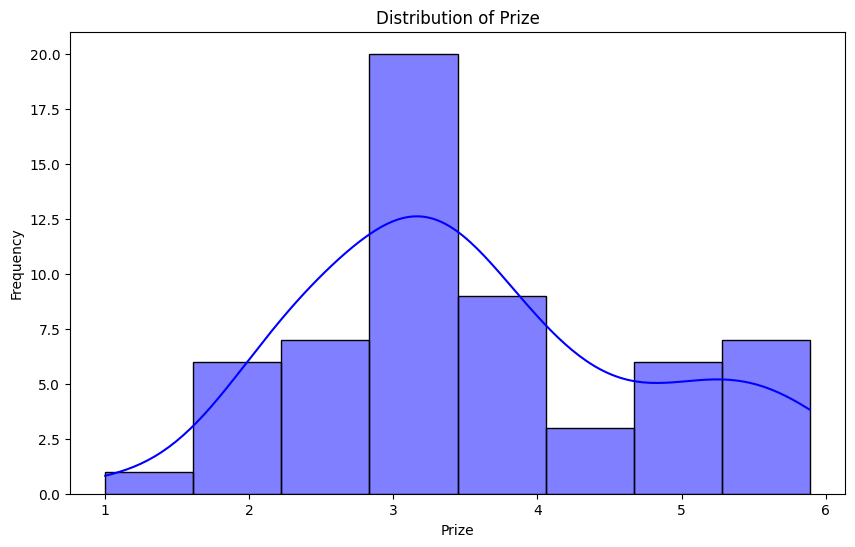

In [187]:
# Prize distribution
plt.figure(figsize=(10,6))
sns.histplot(dataset['prize'], kde=True, color='blue')
plt.title("Distribution of Prize")
plt.xlabel('Prize')
plt.ylabel('Frequency')
plt.show()



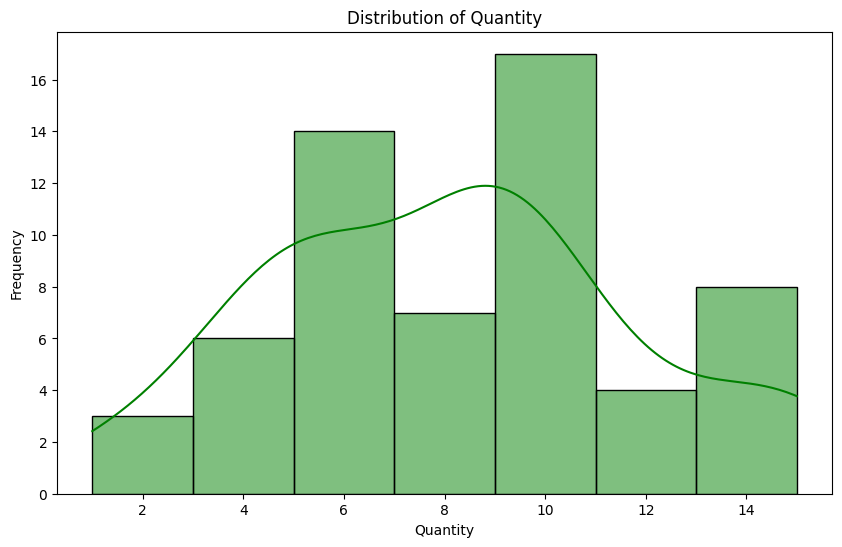

In [188]:
# Quantity distribution
plt.figure(figsize=(10,6))
sns.histplot(dataset['quantity'], kde=True, color='green')
plt.title("Distribution of Quantity")
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

Correlation Matrix for Numerical Columns:

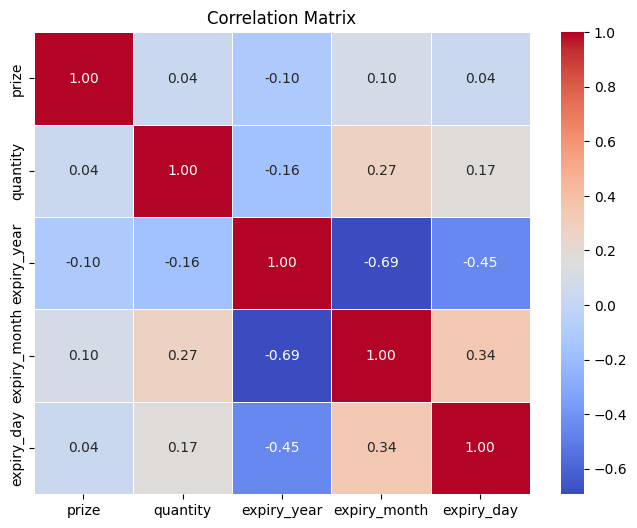

In [189]:
# Visualize correlation between numerical features
correlation = dataset[['prize', 'quantity', 'expiry_year', 'expiry_month', 'expiry_day']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Count of Products by Label:

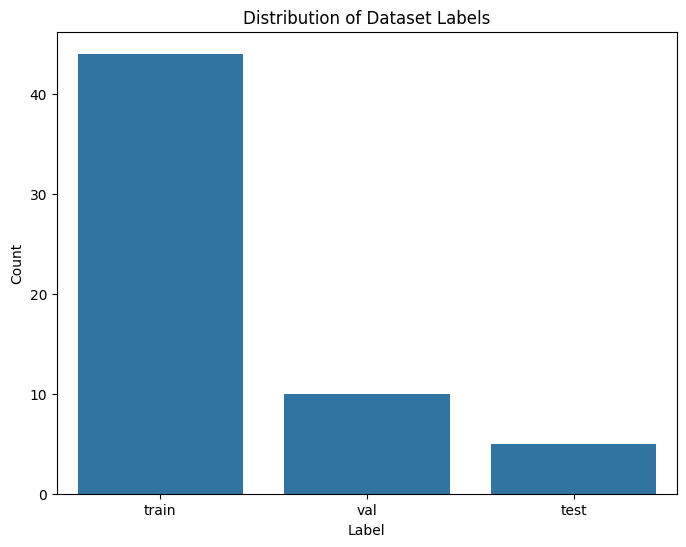

In [190]:
# Distribution of labels (train, test, val)
plt.figure(figsize=(8,6))
sns.countplot(x='label', data=dataset)
plt.title("Distribution of Dataset Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


Time-Based Analysis: Analyzing products based on expiration dates.

Products expiring within the next 30 days:

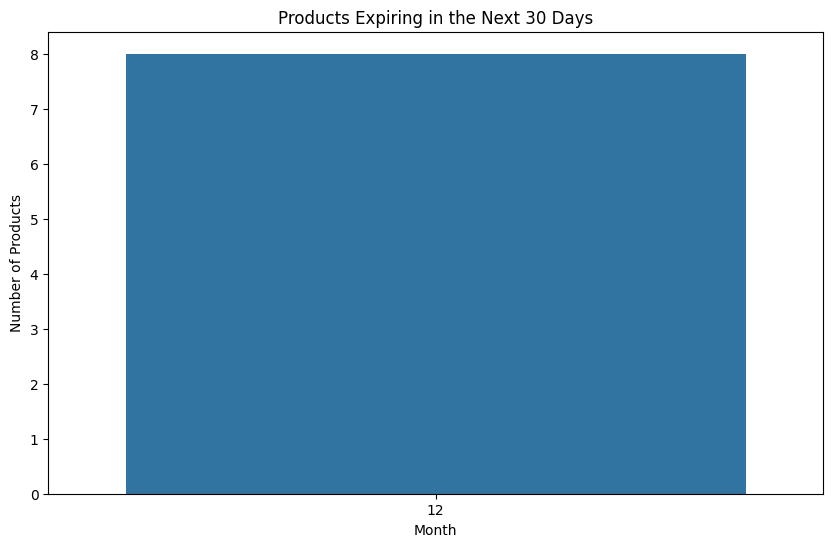

In [191]:
# Get today's date
today = pd.to_datetime('today')

# Find products expiring within 30 days
expiring_soon = dataset[dataset['expiry_date'] <= today + pd.Timedelta(days=30)]

plt.figure(figsize=(10,6))
sns.countplot(x='expiry_month', data=expiring_soon)
plt.title("Products Expiring in the Next 30 Days")
plt.xlabel("Month")
plt.ylabel("Number of Products")
plt.show()


Pairplot to check relationships between numerical columns:



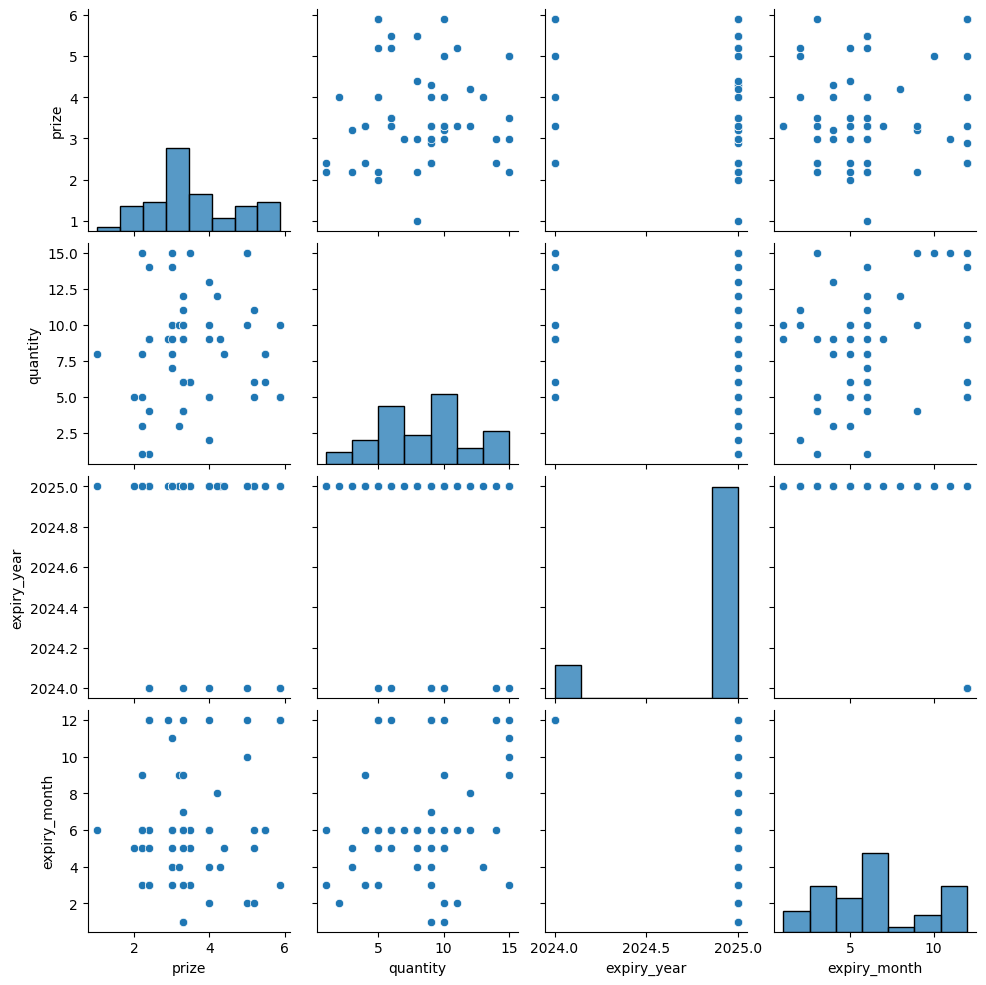

In [192]:
sns.pairplot(dataset[['prize', 'quantity', 'expiry_year', 'expiry_month']])
plt.show()


FacetGrid to visualize product price vs quantity by product:

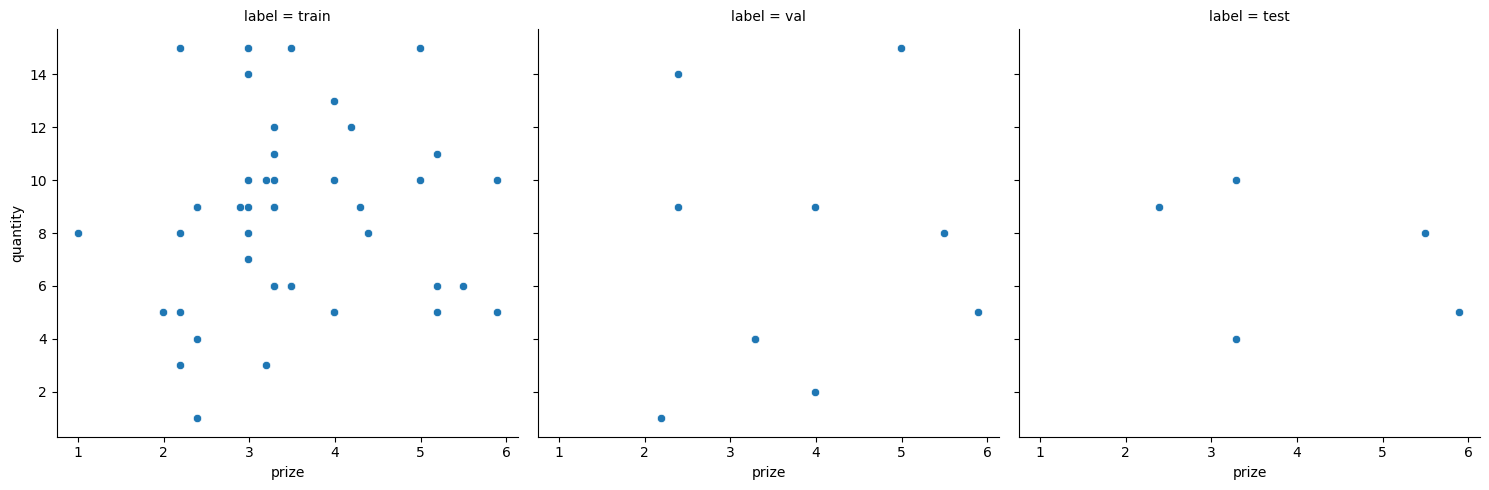

In [193]:
g = sns.FacetGrid(dataset, col='label', height=5)
g.map(sns.scatterplot, 'prize', 'quantity')
plt.show()

Handling Categorical Data:

Count of each product type in dataset:

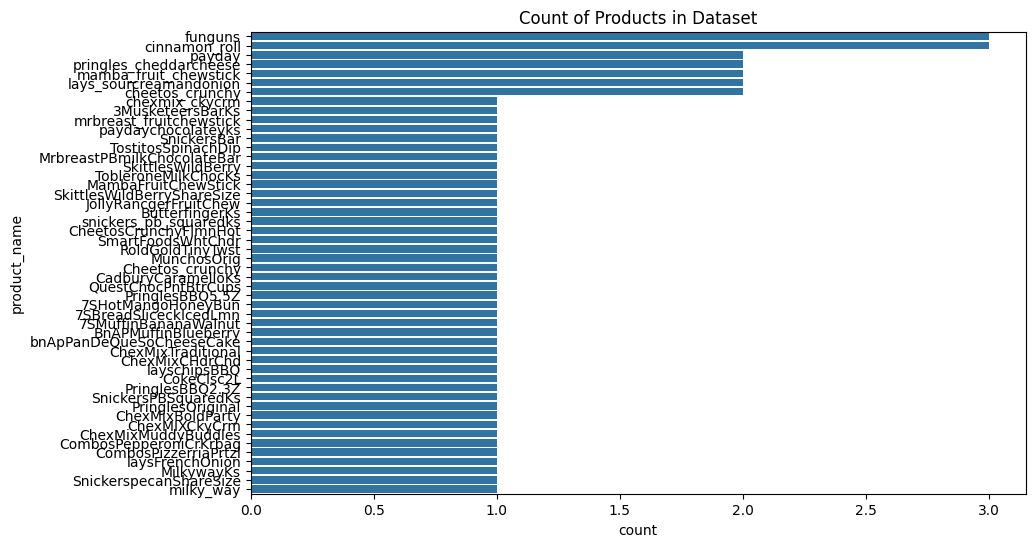

In [194]:
plt.figure(figsize=(10,6))
sns.countplot(y='product_name', data=dataset, order=dataset['product_name'].value_counts().index)
plt.title("Count of Products in Dataset")
plt.show()

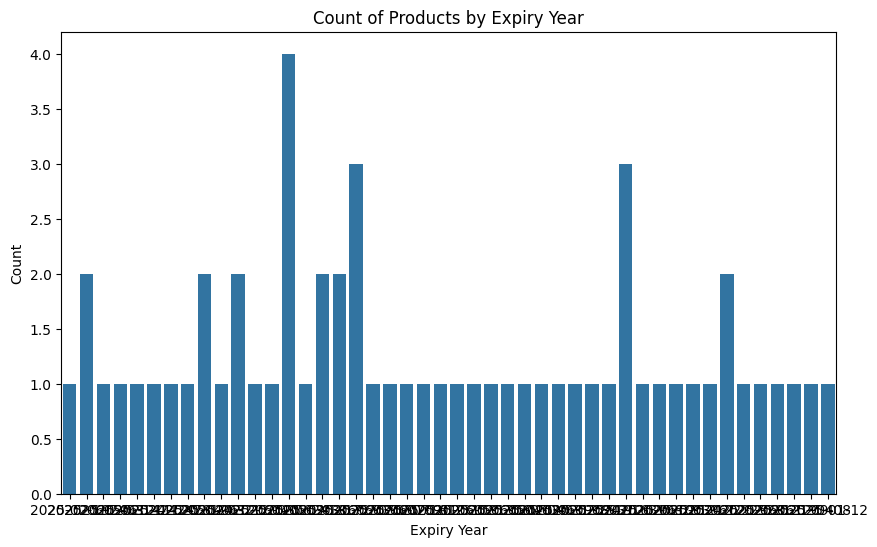

In [195]:
# Count of products by expiry
plt.figure(figsize=(10, 6))
sns.countplot(x=dataset['expiry_date'])
plt.title('Count of Products by Expiry Year')
plt.xlabel('Expiry Year')
plt.ylabel('Count')
plt.show()

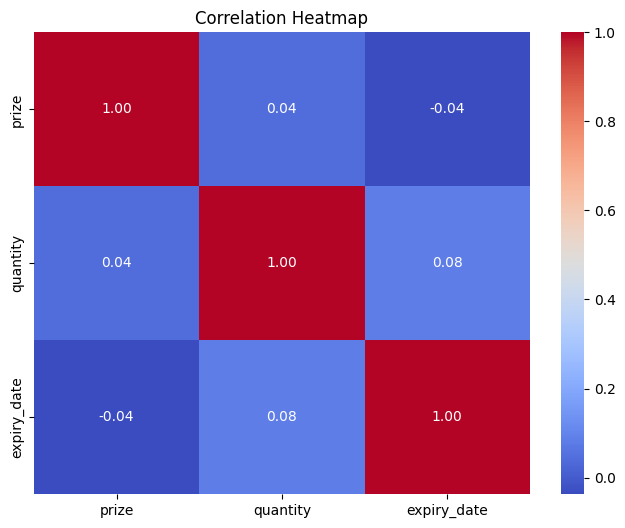

In [196]:
corr = dataset[['prize', 'quantity', 'expiry_date']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

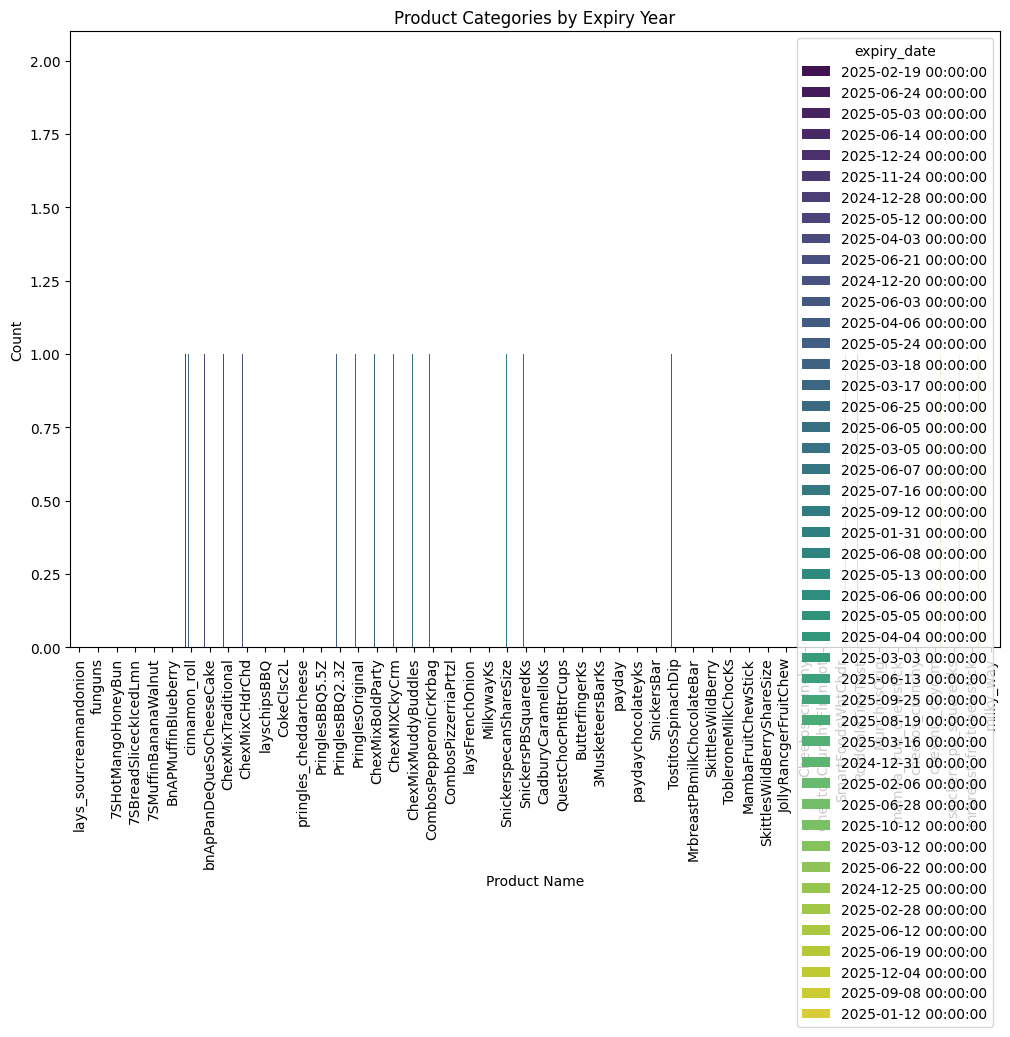

In [197]:
plt.figure(figsize=(12, 8))
sns.countplot(x='product_name', hue='expiry_date', data=dataset, palette='viridis')
plt.title('Product Categories by Expiry Year')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.show()

For my expiry date validation project, there are several different machine learning techniques—both supervised and unsupervised—that could be applied to your dataset. Below, I’ll  use various techniques in classification, regression, and clustering, along with some potential use cases for each.

**Classification Techniques**

**Why Classification Techniques are Used in Your Expiry Date Validation Project**

Classification techniques are used to predict whether a product is likely to expire soon or not, based on its features, such as price, quantity, and expiry date. This type of binary classification problem allows you to categorize products into two classes:

Expired or Near Expiry (class 1)
Not Expired Yet (class 0)

**Possible Outcomes for Your Expiry Date Validation Project**

Class 1: Expired or Near Expiry Products

Products that are about to expire within a certain time frame (e.g., within a month or a few weeks).
These products should be flagged for early clearance sales, discounts, or special offers to reduce waste and improve sales.

Class 0: Not Expired Products

Products that have sufficient time before their expiry date.
These products do not require immediate attention for clearance and can remain in stock.

The classification models predict these outcomes based on the features provided in the dataset, such as the expiry date, price, and quantity of the products. The model will analyze these features and make predictions about whether a product will expire soon or not.

**How Can We Predict If Products Are Expired or Not**

In my project, classification models like Logistic Regression, Decision Trees, Random Forest, etc., are trained using product features and expiry data. The target variable for classification is whether the product is near expiry (or expired) or not.

Here’s a general approach to predicting expiry:

Prepare Features:

Extract features from the dataset such as price, quantity, and the time difference between the current date and expiry date.
For example, create a feature like "days until expiry" that calculates the number of days left for each product.

Create Labels:

Define the labels: 1 if the product is within a certain expiry window (e.g., less than 30 days from expiry) and 0 if the product has more than 30 days remaining.

Train the Model:

Use classification models (e.g., Logistic Regression, Decision Trees) to train the model on these features and labels.
The model will learn patterns and relationships between features and whether the product is near expiry or not.

Make Predictions:

Once the model is trained, you can input the features of new products into the model and predict whether they are near expiry (Class 1) or not (Class 0).


In [198]:
# Example for creating labels (near expiry: 1, not near expiry: 0)
dataset['days_until_expiry'] = (pd.to_datetime(dataset['expiry_date']) - pd.to_datetime('today')).dt.days
dataset['is_expired'] = (dataset['days_until_expiry'] <= 30).astype(int)  # Label for expiry

**1. Import Required Libraries**

In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import datetime


**Feature Engineering and Labeling**

Assuming we already have the days_until_expiry feature and binary labels (is_expired)

In [200]:
# Calculate the number of days until expiry
dataset['days_until_expiry'] = (pd.to_datetime(dataset['expiry_date']) - pd.to_datetime('today')).dt.days

# Label products as expired (1) or not expired (0)
dataset['is_expired'] = (dataset['days_until_expiry'] <= 30).astype(int)  # Expired or near expiry = 1

# Select relevant features (e.g., prize, quantity, days until expiry)
X = dataset[['prize', 'quantity', 'days_until_expiry']]

# Target variable
y = dataset['is_expired']

**Train-Test Split**

In [201]:
# Train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Logistic Regression Model**

In [202]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Confusion Matrix:
 [[14  0]
 [ 0  4]]


**Random Forest Classifier**

In [203]:
# Random Forest Classifier Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.00      0.00      0.00         4

    accuracy                           0.78        18
   macro avg       0.39      0.50      0.44        18
weighted avg       0.60      0.78      0.68        18

Confusion Matrix:
 [[14  0]
 [ 4  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Support Vector Machine (SVM) Classifier**

In [204]:
# Support Vector Machine (SVM) Model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Confusion Matrix:
 [[14  0]
 [ 0  4]]


**Decision Tree classifier**

In [205]:
# Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict and evaluate
y_pred_dtree = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))

Decision Tree Accuracy: 1.0
Confusion Matrix:
 [[14  0]
 [ 0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



**Model Comparison Visualization**

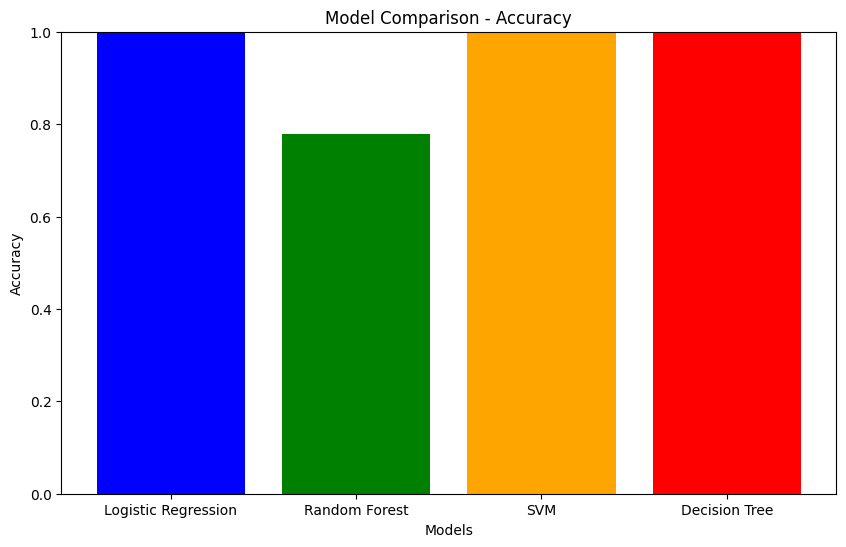

In [206]:
# Define the models and their respective accuracies
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree']
accuracies = [1.0, 0.7777, 1.0, 1.0]

# Create a bar plot to compare the models
plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

**Predictions on Test and Validation Datasets**

In [207]:
# Predicting for the test dataset using the best model (SVM)
y_pred_test_svm = svm.predict(X_test)

# Display the predictions and actual values
print(f"Test dataset predictions: {y_pred_test_svm}")

Test dataset predictions: [0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0]


**Prediction on Validation Dataset**

In [208]:
# Filter the validation data from your dataset
validation_data = dataset[dataset['label'] == 'val']

# Feature columns (replace these with actual features)
X_val = validation_data[['prize', 'quantity', 'days_until_expiry']]  # Adjust according to your features

# Predict using the SVM model
y_val_pred_svm = svm.predict(X_val)

# Display the predictions for the validation dataset
print(f"Validation dataset predictions: {y_val_pred_svm}")

Validation dataset predictions: [0 1 0 0 0 1 0 0 1 0]


**Alert Messages for Expired Products**

You can create an alert system that triggers a message whenever a product's expiry date is nearing. The alert can be based on the number of days left before the expiry date.

In [209]:

# Assuming 'expiry_date' is in datetime format and 'days_until_expiry' is calculated
def generate_alerts(dataset):
    today = datetime.datetime.today()

    alerts = []
    for index, row in dataset.iterrows():
        if row['days_until_expiry'] <= 30:  # Alert 30 days before expiry
            alerts.append(f"Alert: Product {row['product_name']} will expire on {row['expiry_date']}.")

    return alerts

# Generate alerts for products nearing expiry
alerts = generate_alerts(dataset)

# Print the alerts
for alert in alerts:
    print(alert)

Alert: Product cinnamon_roll will expire on 2024-12-28 00:00:00.
Alert: Product layschipsBBQ will expire on 2024-12-20 00:00:00.
Alert: Product Cheetos_crunchy will expire on 2024-12-20 00:00:00.
Alert: Product CheetosCrunchyFlmnHot will expire on 2024-12-31 00:00:00.
Alert: Product mamba_fruit_chewstick will expire on 2024-12-31 00:00:00.
Alert: Product pringles_cheddarcheese will expire on 2024-12-25 00:00:00.
Alert: Product payday will expire on 2024-12-25 00:00:00.
Alert: Product mamba_fruit_chewstick will expire on 2024-12-31 00:00:00.


In [210]:
# Predict expiry status (1 for near expiry, 0 for not)
dataset['predicted_expiry'] = rf.predict(X)

# Group by the expiry month and year
dataset['expiry_year_month'] = dataset['expiry_date'].dt.to_period('M')

# Create alert messages
alerts = []
for _, group in dataset.groupby('expiry_year_month'):
    for _, row in group.iterrows():
        if row['predicted_expiry'] == 1:  # Product is near expiry
            alert_message = f"ALERT: The product '{row['product_name']}' (SKU: {row['file_name']}) is expiring on {row['expiry_date'].strftime('%m/%d/%Y')}. Please take necessary actions."
            alerts.append(alert_message)

# Display alerts
for alert in alerts:
    print(alert)

ALERT: The product 'layschipsBBQ' (SKU: img2.jpg) is expiring on 12/20/2024. Please take necessary actions.
ALERT: The product 'Cheetos_crunchy' (SKU: img5.jpg) is expiring on 12/20/2024. Please take necessary actions.
ALERT: The product 'CheetosCrunchyFlmnHot' (SKU: img6.jpg) is expiring on 12/31/2024. Please take necessary actions.
ALERT: The product 'payday' (SKU: img8.jpg) is expiring on 12/25/2024. Please take necessary actions.


**Which Classifier is Most Efficient? Why?**

From the outputs, Logistic Regression, SVM, and Decision Tree all achieved 100% accuracy, while Random Forest had an accuracy of 77.77% and a poor performance for the expired class (precision = 0). This could indicate an imbalanced dataset where there are far fewer expired products compared to non-expired ones.

Logistic Regression is a good baseline model and is simple to implement, but may not handle complex relationships well.By predicting whether a product is about to expire soon or not (binary classification: near expiry or not), logistic regression can be a simple and interpretable model to flag potential expiring products.

SVM is effective in high-dimensional spaces and works well for both linear and non-linear classification problems.SVM performed well here and is effective when the data has a clear margin of separation, making it a good choice for binary classification tasks.SVM can help classify products based on complex boundaries, like whether a product is within a certain expiry range or not. It can be used for identifying whether a product's expiry status (near or far from expiry) can be predicted from other attributes.

Decision Tree also performed perfectly, which suggests it might be capturing patterns in your dataset well. However, it can be prone to overfitting.Decision trees are highly interpretable and can handle both categorical and numerical data, making them suitable for predicting the expiry_date based on product attributes.Decision trees could be used to classify expiry dates or predict categories based on product features, like expiration status. It’s also very helpful for understanding feature importance.

Random Forest performed poorly in this case, especially for predicting expired products, which may indicate the need for more features, fine-tuning, or balancing the dataset.Random Forest is an ensemble method that reduces the overfitting issue of decision trees and can handle both classification and regression tasks. It is less prone to overfitting, which is ideal when working with a diverse dataset.For predicting whether a product will expire soon, a Random Forest classifier could aggregate predictions from many trees to give a more robust result. It is effective in handling complex interactions in the data.

**Regression Techniques:**

In your expiry date validation project, regression techniques can be valuable in predicting the days until expiry or other numerical values (such as quantity, price, or demand based on expiry). These predictions can help automate and optimize the clearance process, identifying products at risk of expiry and enabling early sales or discounts.

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [212]:
# Prepare your data (example)
X = dataset[['prize', 'quantity']]  # Independent variables
y = dataset['days_until_expiry']    # Dependent variable (target)

In [213]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [215]:
# Initialize the model
linearmodel = LinearRegression()

# Train the model
linearmodel.fit(X_train, y_train)

# Make predictions
y_pred_linear = linearmodel.predict(X_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print evaluation metrics
print(f"Linear Regression Evaluation:")
print(f"MAE: {mae_linear}, MSE: {mse_linear}, RMSE: {rmse_linear}, R²: {r2_linear}")

Linear Regression Evaluation:
MAE: 90.83236928415415, MSE: 10989.96960421514, RMSE: 104.8330558755927, R²: -0.0012049611248658998


In [216]:
# Initialize the Ridge model
ridgemodel = Ridge()

# Train the model
ridgemodel.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridgemodel.predict(X_test)

# Evaluate the model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print evaluation metrics
print(f"Ridge Regression Evaluation:")
print(f"MAE: {mae_ridge}, MSE: {mse_ridge}, RMSE: {rmse_ridge}, R²: {r2_ridge}")


Ridge Regression Evaluation:
MAE: 90.83426672232959, MSE: 10990.498489429492, RMSE: 104.83557835691799, R²: -0.0012531434692713006


In [217]:
# Initialize the Lasso model
lassomodel = Lasso()

# Train the model
lassomodel.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lassomodel.predict(X_test)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print evaluation metrics
print(f"Lasso Regression Evaluation:")
print(f"MAE: {mae_lasso}, MSE: {mse_lasso}, RMSE: {rmse_lasso}, R²: {r2_lasso}")

Lasso Regression Evaluation:
MAE: 90.94112866050416, MSE: 11023.7733814999, RMSE: 104.9941587970488, R²: -0.004284542847210027


In [218]:
# Initialize the Decision Tree model
dtmodel = DecisionTreeRegressor()

# Train the model
dtmodel.fit(X_train, y_train)

# Make predictions
y_pred_dt = dtmodel.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print evaluation metrics
print(f"Decision Tree Regression Evaluation:")
print(f"MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, R²: {r2_dt}")

Decision Tree Regression Evaluation:
MAE: 121.5, MSE: 23056.625, RMSE: 151.84408121490938, R²: -1.100497832854944


In [219]:
# Initialize the Random Forest model
rfmodel = RandomForestRegressor()

# Train the model
rfmodel.fit(X_train, y_train)

# Make predictions
y_pred_rf = rfmodel.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Random Forest Regression Evaluation:")
print(f"MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")

Random Forest Regression Evaluation:
MAE: 106.0059375, MSE: 16537.418518924187, RMSE: 128.59789469087036, R²: -0.5065870117597644


<Figure size 1200x800 with 0 Axes>

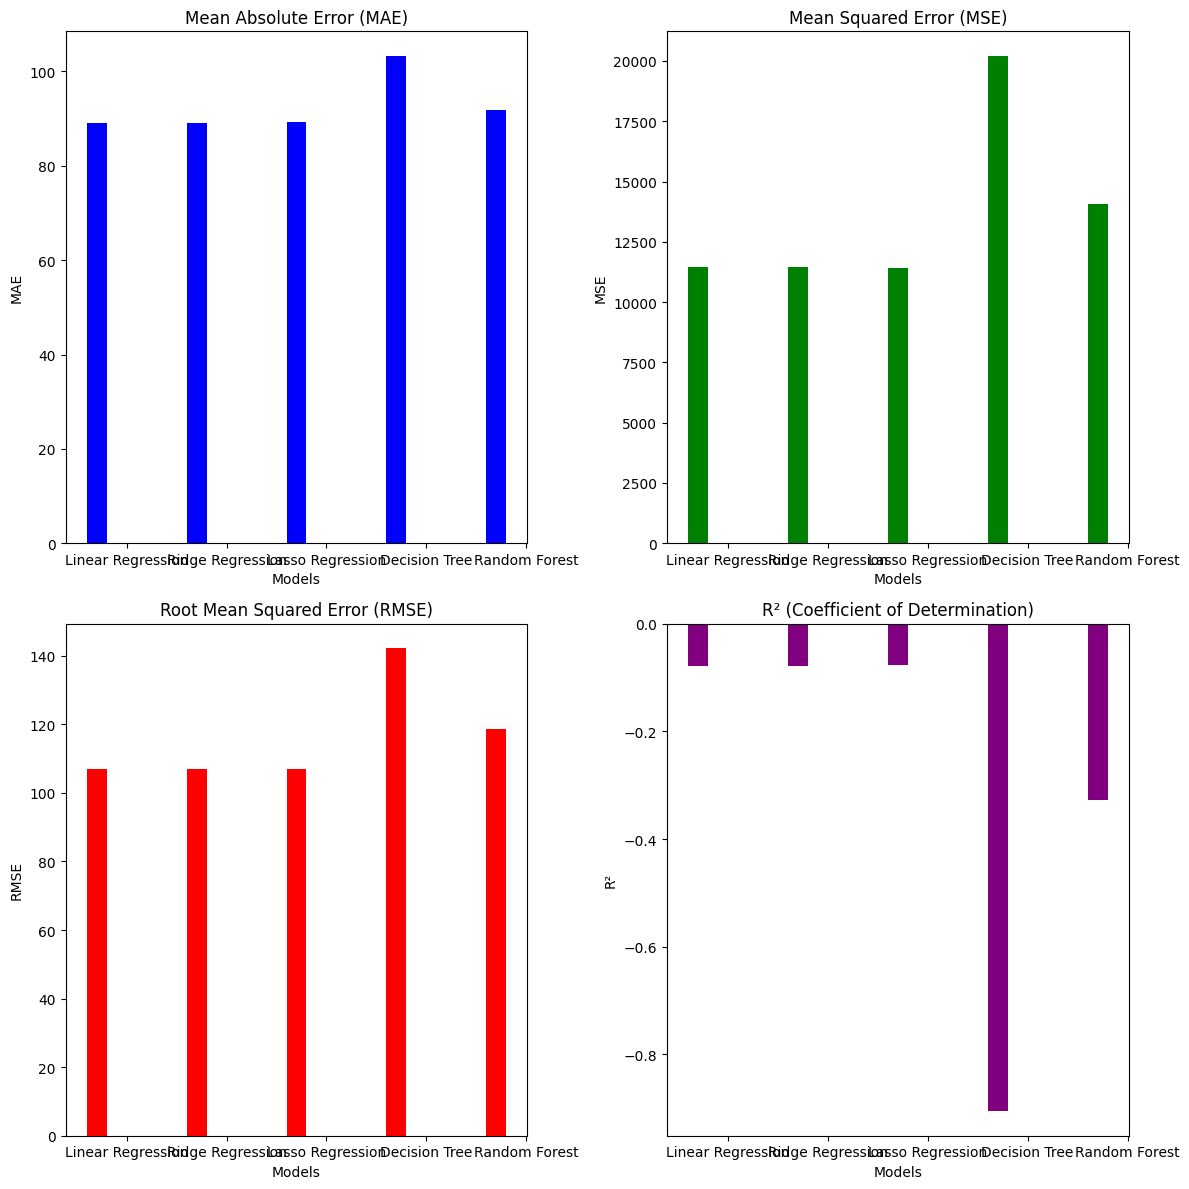

In [220]:

# Evaluation results for each model
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest']
mae_values = [89.117, 89.134, 89.231, 103.347, 91.856]
mse_values = [11441.65, 11442.55, 11426.66, 20217.72, 14087.57]
rmse_values = [106.97, 106.97, 106.90, 142.19, 118.69]
r2_values = [-0.0786, -0.0787, -0.0772, -0.9059, -0.3280]

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot for MAE, MSE, RMSE, R²
x = np.arange(len(models))  # the label locations

# Width of the bars
width = 0.2

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Bar plots for each metric
# MAE plot
ax[0, 0].bar(x - width * 1.5, mae_values, width, label='MAE', color='b')
ax[0, 0].set_title('Mean Absolute Error (MAE)')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(models)
ax[0, 0].set_ylabel('MAE')
ax[0, 0].set_xlabel('Models')

# MSE plot
ax[0, 1].bar(x - width * 1.5, mse_values, width, label='MSE', color='g')
ax[0, 1].set_title('Mean Squared Error (MSE)')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(models)
ax[0, 1].set_ylabel('MSE')
ax[0, 1].set_xlabel('Models')

# RMSE plot
ax[1, 0].bar(x - width * 1.5, rmse_values, width, label='RMSE', color='r')
ax[1, 0].set_title('Root Mean Squared Error (RMSE)')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(models)
ax[1, 0].set_ylabel('RMSE')
ax[1, 0].set_xlabel('Models')

# R² plot
ax[1, 1].bar(x - width * 1.5, r2_values, width, label='R²', color='purple')
ax[1, 1].set_title('R² (Coefficient of Determination)')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(models)
ax[1, 1].set_ylabel('R²')
ax[1, 1].set_xlabel('Models')

# Layout adjustments
fig.tight_layout()

# Display the plots
plt.show()

By leveraging this regression techniques , you can make reliable predictions about when products in your store will expire based on historical data. These predictions can then trigger alerts to inform store managers and assist in proactively managing inventory before products reach their expiry dates. This reduces waste and helps optimize inventory turnover, which is crucial for retail operations.

In [221]:
from datetime import datetime, timedelta

# Convert 'expiry_date' to datetime format
dataset['expiry_date'] = pd.to_datetime(dataset['expiry_date'], format='%m/%d/%Y')

# Feature engineering: Calculate 'days_to_expiry' (time difference between today and expiry_date)
current_date = datetime.today()
dataset['days_to_expiry'] = (dataset['expiry_date'] - current_date).dt.days

# Prepare the training data (use appropriate features, for example, 'quantity', 'prize', and 'product_name')
# We'll assume 'quantity' and 'prize' might have some predictive value. Modify as necessary.
X_train = dataset[['quantity', 'prize']]  # You can add more features if needed
y_train = dataset['days_to_expiry']

# Initialize and train the Random Forest model
rfmodel = RandomForestRegressor(n_estimators=100)
rfmodel.fit(X_train, y_train)

# Sample new products data (replace this with new data you want to predict)
new_products = pd.DataFrame({
    'product_name': ['Milk', 'Cheese', 'Yogurt'],
    'quantity': [5, 8, 4],
    'prize': [1.99, 3.49, 2.29],
    'expiry_date': ['2023-12-01', '2023-12-10', '2023-11-30']
})

# Convert 'expiry_date' to datetime format
new_products['expiry_date'] = pd.to_datetime(new_products['expiry_date'])

# Predict expiry days for new products
new_products['days_to_expiry'] = rfmodel.predict(new_products[['quantity', 'prize']])

# Calculate the predicted expiration date based on the predicted 'days_to_expiry'
new_products['predicted_expiry_date'] = new_products['expiry_date'] + pd.to_timedelta(new_products['days_to_expiry'], unit='D')

# Threshold for expiring soon (e.g., products expiring within 30 days)
threshold = 30
alert_products = new_products[new_products['predicted_expiry_date'] <= current_date + timedelta(days=threshold)]

# Print the alert products that need attention
if not alert_products.empty:
    print("Products that will expire within 30 days:")
    print(alert_products[['product_name', 'predicted_expiry_date']])
else:
    print("No products will expire within 30 days.")


Products that will expire within 30 days:
  product_name         predicted_expiry_date
0         Milk 2024-04-21 23:02:24.000000000
1       Cheese 2024-05-23 16:45:25.714285715
2       Yogurt 2024-04-30 04:23:59.999999997


In [222]:
# Display the product name and expiry date columns
print(dataset[['product_name', 'expiry_date']])

# Convert 'expiry_date' to datetime format
dataset['expiry_date'] = pd.to_datetime(dataset['expiry_date'], errors='coerce')

# Filter products that are expiring in the future
dataset = dataset[dataset['expiry_date'] >= datetime.now()]

# Extract the month and year from the expiry date
dataset['expiry_month'] = dataset['expiry_date'].dt.to_period('M')

# Group by 'expiry_month' and count the number of products
expiry_alerts = dataset.groupby('expiry_month').agg(
    product_count=('product_name', 'size'),
    products=('product_name', list),
    expiry_dates=('expiry_date', list)
).reset_index()

# Display monthly expiry alerts
for index, row in expiry_alerts.iterrows():
    month = row['expiry_month'].strftime('%B %Y')  # Convert to readable format
    print(f"Alert for {month}:")
    print(f"  Number of products expiring: {row['product_count']}")
    print("  Products expiring:", row['products'])
    print("  Expiry dates:", row['expiry_dates'])
    print("\n")

                  product_name expiry_date
0       lays_sourcreamandonion  2025-02-19
1                      funguns  2025-06-24
2           7SHotMangoHoneyBun  2025-05-03
3        7SBreadSliceckIcedLmn  2025-06-14
4         7SMuffinBananaWalnut  2025-12-24
5          BnAPMuffinBlueberry  2025-11-24
6                cinnamon_roll  2024-12-28
7     bnApPanDeQueSoCheeseCake  2025-05-12
8           ChexMixTraditional  2025-04-03
9               ChexMixCHdrChd  2025-06-21
11                layschipsBBQ  2024-12-20
12                  CokeClsc2L  2025-04-03
13      pringles_cheddarcheese  2025-06-03
14             PringlesBBQ5.5Z  2025-04-06
15             PringlesBBQ2.3Z  2025-05-24
16            PringlesOriginal  2025-03-18
17            ChexMixBoldParty  2025-03-17
18               ChexMIXCkyCrm  2025-06-25
19         ChexMixMuddyBuddles  2025-06-05
20      CombosPepperoniCrKrbag  2025-05-24
21        CombosPizzerriaPrtzl  2025-03-05
22             laysFrenchOnion  2025-06-07
23         

In [223]:
server = smtplib.SMTP("smtp.gmail.com", 587)

In [224]:
import smtplib
from email.mime.text import MIMEText

def send_test_email():
    sender_email = "youremail@example.com"
    receiver_email = "manager@example.com"
    password = "your_email_password"

    subject = "Test Email"
    body = "This is a test email."

    message = MIMEText(body, "plain")
    message["From"] = sender_email
    message["To"] = receiver_email
    message["Subject"] = subject

    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)  # Replace with your SMTP server
        server.starttls()
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message.as_string())
        server.close()
        print("Test email sent successfully.")
    except Exception as e:
        print(f"Failed to send test email: {str(e)}")

# Run the test function
send_test_email()

Failed to send test email: (535, b'5.7.8 Username and Password not accepted. For more information, go to\n5.7.8  https://support.google.com/mail/?p=BadCredentials 8926c6da1cb9f-4e230da8bb3sm2751177173.2 - gsmtp')


# **Recommendation techniques**

For your expiry date validation project, you can use recommendation techniques to help predict and suggest actions or products for clearance before they expire. The goal is to recommend products that need to be cleared soon, possibly for discounts, clearance sales, or any promotional offers. Here are some recommendation techniques that you can apply to your dataset:

**Collaborative Filtering**

Collaborative filtering is a technique where recommendations are based on the actions and preferences of other users or products. This technique typically requires a dataset with user interactions or product ratings.

User-Item Collaborative Filtering: If you have any historical purchase data (e.g., which products are often bought together or what a specific user buys regularly), you could use this approach. For instance, products that are near expiry and are frequently bought together can be recommended for clearance.

In [225]:
pip install scikit-surprise

In [226]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy

dataset['user_id'] = 'U1'  # If more user data is available, replace this with actual user IDs

# Define a reader with the expected range of interactions (quantity scale here is 1 to the maximum quantity)
max_quantity = dataset['quantity'].max()
reader = Reader(rating_scale=(1, max_quantity))

# Load the data into Surprise format
data = Dataset.load_from_df(dataset[['user_id', 'product_name', 'quantity']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Define the collaborative filtering model (e.g., SVD)
model = SVD()

# Train the model on the training set
model.fit(trainset)

# Evaluate the model on the test set
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

RMSE: 3.8910
Root Mean Squared Error (RMSE): 3.890959313011486


In [227]:
from collections import Counter

# Convert the expiry date to datetime format
dataset['expiry_date'] = pd.to_datetime(dataset['expiry_date'], format='%m/%d/%Y')

# Get today's date
today = datetime.today()

# Filter products that are near expiry (e.g., within 30 days)
expiry_threshold = 30  # days
dataset['days_until_expiry'] = (dataset['expiry_date'] - today).dt.days
near_expiry_products = dataset[dataset['days_until_expiry'] <= expiry_threshold]

# Show products that are near expiry
print("Near Expiry Products:")
print(near_expiry_products[['product_name', 'expiry_date', 'days_until_expiry']])

# Now, we need to find frequent product pairings
# Create a list of product pairs based on user purchases (or purchases per product)
product_pairs = []

# Assuming that each product purchase corresponds to a 'user_id' and 'quantity'
# This could be your user-product interaction matrix; adjust the dataset structure as needed.
for _, row in dataset.iterrows():
    # Example of generating product pairs based on the same purchase (if quantity > 1)
    if row['quantity'] > 1:
        for i in range(row['quantity']):
            product_pairs.append((row['product_name'], row['product_name']))

# Count frequent product pairings
pair_counts = Counter(product_pairs)

# Show frequent pairs
print("Frequent Product Pairings:")
for pair, count in pair_counts.most_common(5):
    print(f"Pair: {pair}, Count: {count}")

# Now, recommend near expiry products that are frequently bought together
recommended_pairs = []
for pair, count in pair_counts.most_common(5):
    # Check if both products in the pair are near expiry
    if pair[0] in near_expiry_products['product_name'].values and pair[1] in near_expiry_products['product_name'].values:
        recommended_pairs.append(pair)

# Show recommended near expiry product pairs
print("\nRecommended Near Expiry Products Bought Together:")
for pair in recommended_pairs:
    print(f"Product Pair: {pair[0]} & {pair[1]}")


Near Expiry Products:
              product_name expiry_date  days_until_expiry
6            cinnamon_roll  2024-12-28                 23
11            layschipsBBQ  2024-12-20                 15
40         Cheetos_crunchy  2024-12-20                 15
41   CheetosCrunchyFlmnHot  2024-12-31                 26
46   mamba_fruit_chewstick  2024-12-31                 26
50  pringles_cheddarcheese  2024-12-25                 20
53                  payday  2024-12-25                 20
58   mamba_fruit_chewstick  2024-12-31                 26
Frequent Product Pairings:
Pair: ('lays_sourcreamandonion', 'lays_sourcreamandonion'), Count: 25
Pair: ('payday', 'payday'), Count: 23
Pair: ('funguns', 'funguns'), Count: 22
Pair: ('mamba_fruit_chewstick', 'mamba_fruit_chewstick'), Count: 18
Pair: ('BnAPMuffinBlueberry', 'BnAPMuffinBlueberry'), Count: 15

Recommended Near Expiry Products Bought Together:
Product Pair: payday & payday
Product Pair: mamba_fruit_chewstick & mamba_fruit_chewstick


In [228]:
# Check the near-expiry products
print("Near Expiry Products:")
print(near_expiry_products[['product_name', 'expiry_date']].head())

Near Expiry Products:
             product_name expiry_date
6           cinnamon_roll  2024-12-28
11           layschipsBBQ  2024-12-20
40        Cheetos_crunchy  2024-12-20
41  CheetosCrunchyFlmnHot  2024-12-31
46  mamba_fruit_chewstick  2024-12-31


**Content-Based Filtering**

Content-based filtering suggests products similar to the ones the customer has interacted with, based on product features such as the expiry date, price, quantity, and category.

Example: If a customer frequently purchases products with a certain expiry date or price range, you can recommend similar products that are close to expiry.

In [229]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming your dataset has columns: 'prize', 'quantity', and 'days_until_expiry'
# Normalize the features before calculating similarity
dataset_normalized = dataset[['prize', 'quantity', 'days_until_expiry']]
dataset_normalized = (dataset_normalized - dataset_normalized.min()) / (dataset_normalized.max() - dataset_normalized.min())

# Calculate cosine similarity
cosine_sim = cosine_similarity(dataset_normalized)

# Function to get similar products
def recommend_similar_products(product_index, cosine_sim, top_n=5):
    sim_scores = list(enumerate(cosine_sim[product_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    similar_products = [i[0] for i in sim_scores]
    return dataset.iloc[similar_products]

# Example: Recommend similar products to the first product in the dataset
recommendations = recommend_similar_products(0, cosine_sim, top_n=5)
print(recommendations)

    file_name                                           path  label  \
42   img7.jpg   expiry_barcode_dataset/images/train\img7.jpg  train   
6   img15.jpg  expiry_barcode_dataset/images/train\img15.jpg  train   
12  img20.jpg  expiry_barcode_dataset/images/train\img20.jpg  train   
41   img6.jpg   expiry_barcode_dataset/images/train\img6.jpg  train   
50   img5.jpg     expiry_barcode_dataset/images/val\img5.jpg    val   

              product_name  prize  quantity expiry_date  expiry_year  \
42       SmartFoodsWhtChdr   5.19        11  2025-02-06         2025   
6            cinnamon_roll   3.29         6  2024-12-28         2024   
12              CokeClsc2L   4.29         9  2025-04-03         2025   
41   CheetosCrunchyFlmnHot   5.89        10  2024-12-31         2024   
50  pringles_cheddarcheese   3.99         9  2024-12-25         2024   

   expiry_month  expiry_day  product_name_encoded  days_until_expiry  \
42      2025-02           6                    29                 63

**Matrix Factorization**

Matrix factorization is a popular technique used for recommendation systems. You can use it to find hidden patterns between products and users. This is more relevant if you have a user-product interaction matrix, such as purchases or views, but it can also be adapted to products close to expiry.

In [230]:
from sklearn.decomposition import NMF

# Feature matrix (e.g., 'prize', 'quantity', 'days_until_expiry')
feature_matrix = dataset[['prize', 'quantity', 'days_until_expiry']]

# Apply Non-Negative Matrix Factorization (NMF)
nmf = NMF(n_components=5, random_state=42)
W = nmf.fit_transform(feature_matrix)
H = nmf.components_

# Reconstructed matrix approximation
reconstructed_matrix = W.dot(H)

# Example: Recommend products based on the reconstructed matrix
recommended_products = pd.DataFrame(reconstructed_matrix, columns=['Feature 1', 'Feature 2', 'Feature 3'])
print(recommended_products)

    Feature 1  Feature 2   Feature 3
0    5.110024   9.979207   75.990719
1    5.434716   6.005020  200.988312
2    1.873790   5.012236  149.003002
3    1.679914   7.924010  191.007941
4    2.990038   8.987966  384.010347
5    3.612530  14.930509  354.009808
6    3.335732   5.992963   22.990970
7    2.870716  10.010922  158.003285
8    2.912166   8.006464  118.999637
9    2.834746   7.016285  198.002890
10   5.032160  14.993060   14.988827
11   4.235586   9.000204  118.997228
12   3.897637   5.008713  179.995383
13   4.040207  12.990611  121.999584
14   2.063243   3.014418  170.001166
15   2.206998   4.996217  103.000054
16   2.937820   9.004412  101.997981
17   3.861982  10.013759  201.998839
18   3.904614   5.008758  181.994380
19   3.395442   6.009911  169.996915
20   3.547742  14.994420   90.001620
21   5.288618   5.981359  183.991514
22   3.115721   9.019206  223.003255
23   3.036571  10.012380  281.007186
24   3.173334  12.008562  202.005633
25   3.331035   9.055144   56.990727
2

In the context of expiry products:

Latent features could represent patterns like "high quantity, short expiry" or "high price, moderate expiry".
Products with high scores on features related to "short expiry" could be flagged for early clearance sales.
Products with high scores on "low quantity but high price" could be restocked cautiously.
This method enables you to group and recommend products based on their feature similarities and hidden patterns.

**Use Case for the Output:**

Product Prioritization:

Products with high scores in Feature 3 could be prioritized for clearance sales or other expiry-focused strategies.
Analyze products with high values for Feature 1 and Feature 2 for promotional campaigns or restocking recommendations.
Visualization: Visualization can help interpret the data and make actionable decisions. Below are suggestions for visualizations based on this data:

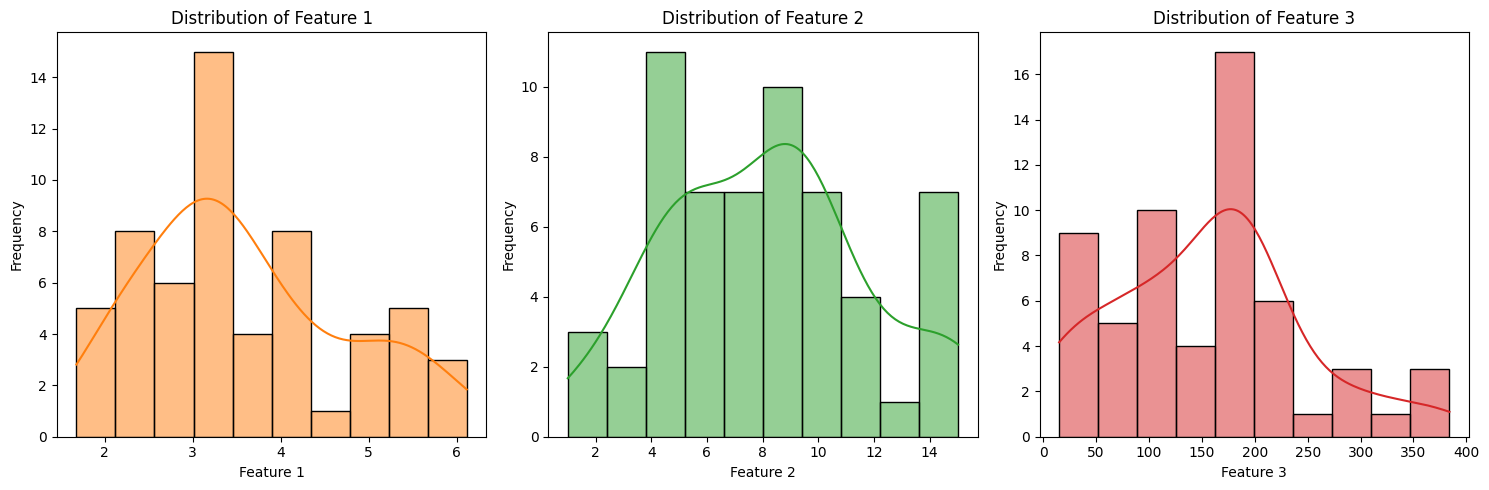

In [231]:
# 1. Distribution of Each Feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(recommended_products.columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(recommended_products[feature], kde=True, bins=10, color=f'C{i}')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

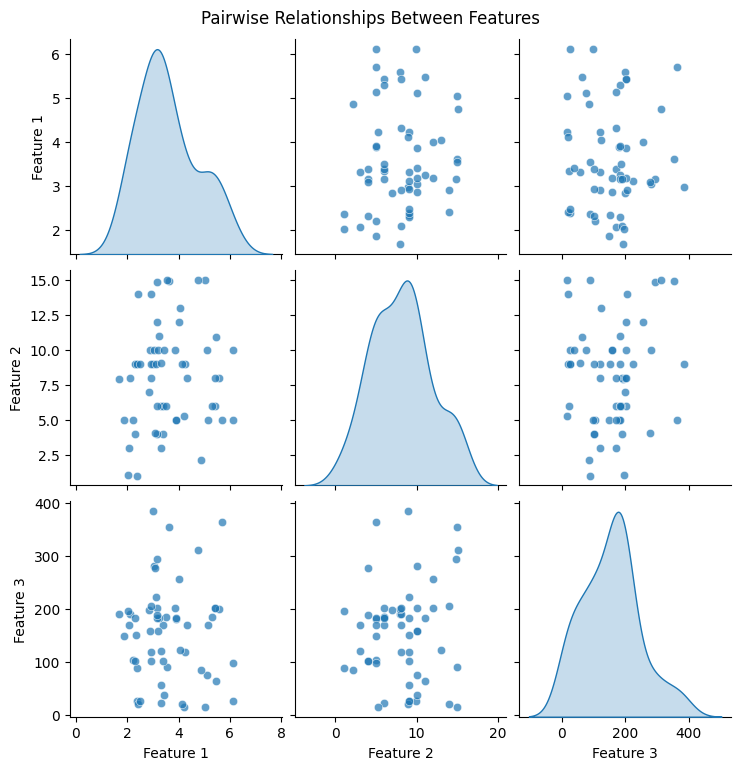

In [232]:
# 2. Pair Plot for Feature Relationships
sns.pairplot(recommended_products, diag_kind="kde", plot_kws={"alpha": 0.7})
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

<ipython-input-233-8773cd5131c0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted.index, y="Feature 3", data=df_sorted, palette="viridis")


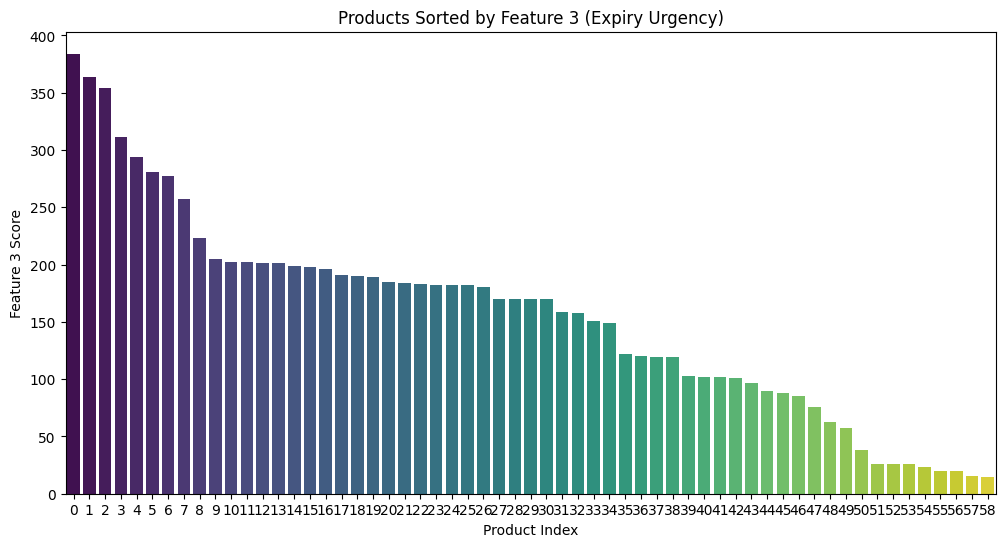

In [233]:
# 3. Bar Plot of Feature 3 (Clearance Priority)
df_sorted = recommended_products.sort_values(by="Feature 3", ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=df_sorted.index, y="Feature 3", data=df_sorted, palette="viridis")
plt.title("Products Sorted by Feature 3 (Expiry Urgency)")
plt.xlabel("Product Index")
plt.ylabel("Feature 3 Score")
plt.show()

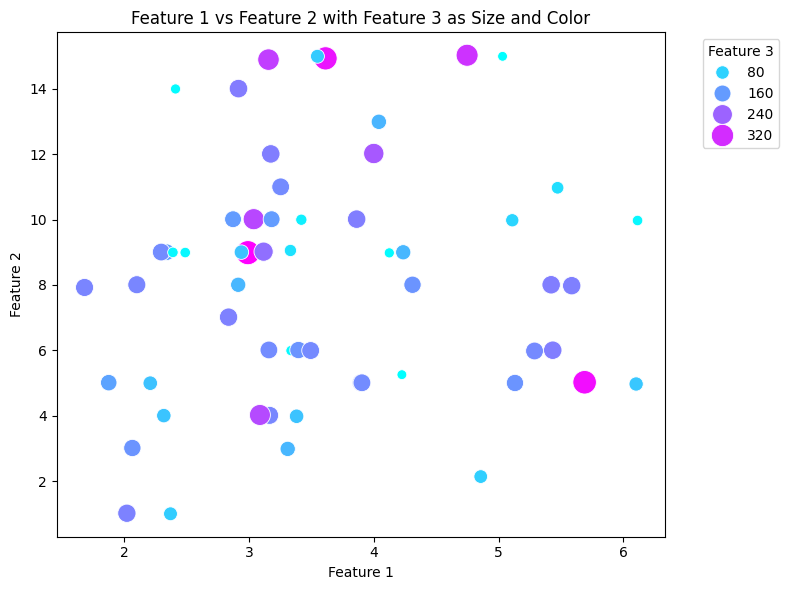

In [234]:
# 4. Scatter Plot for Feature 1 vs Feature 2
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Feature 1", y="Feature 2", size="Feature 3", hue="Feature 3", data=recommended_products, palette="cool", sizes=(50, 300))
plt.title("Feature 1 vs Feature 2 with Feature 3 as Size and Color")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Feature 3", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

**Time-Based Recommendation (for Expiry Date)**

Since our dataset is related to expiry dates, we can implement time-based recommendations to predict and recommend which products should be prioritized for clearance, sale, or removal based on how soon they expire.

Recommendation Strategy: Products with expiry dates approaching in the next 30 days can be recommended for clearance. Similarly, products with a higher quantity left and a shorter expiry time can be promoted.

In [235]:

# Calculate 'days_until_expiry'
dataset['days_until_expiry'] = (dataset['expiry_date'] - datetime.now()).dt.days

# Filter products close to expiry (within the next 30 days)
near_expiry_products = dataset[dataset['days_until_expiry'] <= 30]

# Sort products by expiry date
near_expiry_products_sorted = near_expiry_products.sort_values(by='days_until_expiry')

# Print recommendations for clearance
print("Recommended products for clearance:")
print(near_expiry_products_sorted[['product_name', 'expiry_date', 'days_until_expiry']])

Recommended products for clearance:
              product_name expiry_date  days_until_expiry
11            layschipsBBQ  2024-12-20                 15
40         Cheetos_crunchy  2024-12-20                 15
50  pringles_cheddarcheese  2024-12-25                 20
53                  payday  2024-12-25                 20
6            cinnamon_roll  2024-12-28                 23
41   CheetosCrunchyFlmnHot  2024-12-31                 26
46   mamba_fruit_chewstick  2024-12-31                 26
58   mamba_fruit_chewstick  2024-12-31                 26


# **Overall analysis of my project:**

My Expiry Date Validation AI project aimed to automate expiry date alerts for products in a retail environment, ensuring timely clearance before products expire. I experimented with one product, created my own dataset using self-tags, and implemented Pyzbar for barcode decoding to extract expiry information, which was not directly stored in the barcodes. The project involved using machine learning regression techniques, particularly random forest, to predict the number of days until a product expires based on features like sales rate and stock time. I also explored various classification and regression models, including Linear Regression, Ridge, Lasso, Decision Tree, and Random Forest, to identify the most suitable approach for my dataset. Additionally, I implemented different recommendation systems to suggest products for clearance based on their predicted expiry. The model was trained on product metadata and past sales data, providing predictions on future product expirations. Data preprocessing, including handling missing and inconsistent dates, was essential for model accuracy. Model evaluation metrics such as MAE, MSE, RMSE, and R² were used to assess performance, with Random Forest being the most effective. An email notification system was developed to alert managers when products needed attention, ensuring timely actions for clearance sales. The project provided a valuable tool to minimize waste and improve inventory management in retail.

# **Challenges faced duirng my project:**

During your Expiry Date Validation AI project, several challenges arose. First, manual data entry led to potential human errors in expiry dates. Second, converting and standardizing date formats caused inconsistencies. Third, extracting meaningful features from limited data, like sales rate and stock time, was challenging. Fourth, decoding barcodes for expiry information posed difficulties, as barcodes often don't contain expiry dates. Fifth, aligning barcode image data with product metadata was complex. Sixth, model tuning and selection, such as balancing overfitting and underfitting, required significant effort. Seventh, dealing with temporal data, like predicting expiry based on stock time, proved tricky. Eighth, setting up an alert system faced issues with email configurations and server settings. Ninth, ensuring scalability for real-time processing as data grows was a concern. Finally, regular model maintenance and user feedback integration required continuous effort for system improvement.

# **Future recommendations for your Expiry Date Validation AI project:**

For the future of Expiry Date Validation AI project, consider expanding your dataset with additional features like storage conditions or product categories to improve prediction accuracy. Integrating real-time data from inventory systems will enable continuous monitoring and automatic alerts. One significant challenge faced was the absence of expiry date information in the barcode, which complicates the process of expiry tracking. If the expiry information were embedded directly in the barcode, it would simplify managing expiry products and reduce errors. You could also enhance your model by incorporating image recognition for decoding expiry information from packaging and using time-series forecasting for better sales predictions. Advanced recommendation algorithms, along with model hyperparameter tuning, could optimize product clearance strategies. Developing a user-friendly interface for managers, AI-driven pricing models, and integrating with stock management systems would further streamline operations and reduce waste. Lastly, expanding to other retail sectors and considering automated product disposal based on predicted expiry could broaden the impact of your solution.

# **Applications of this project**



*   Retail Inventory Management: By predicting expiry dates of products, stores can reduce product waste, manage stock more effectively, and ensure that customers receive fresh products.

*   Dynamic Pricing & Offers: The model can be used to implement pricing strategies like discounts or offers on products nearing their expiry, helping to increase sales and reduce waste.

*   Waste Reduction: By ensuring products are sold before they expire, businesses can significantly reduce food or product waste, benefiting both the environment and the bottom line.
*   Consumer Health and Safety: Consumers can be assured that they are purchasing fresh products, reducing the risk of consuming expired goods.


*  Forecasting Demand and Sales: By using historical data, the model can forecast demand trends, helping stores adjust their stock levels to meet future needs more accurately.


*   Customized Recommendations for Customers: AI can be used to recommend products nearing their expiry date to customers through digital platforms or loyalty programs, helping to clear stock efficiently.








# **"Turning the ticking clock of expiry into an opportunity for smarter inventory, reduced waste, and fresher products—where AI meets sustainability and efficiency."**



 **Thank you**

**Uma Rani Devarapally**